# Main loop for integrating neural data processing and robot command

In [1]:
#%matplotlib inline
%matplotlib notebook
# imports

# modules for robot
import re
import time
import threading
import signal
import serial

# modules for brain
from IPython.display import HTML
import numpy as np
import pandas as pd
import peakutils as pku
import functools 
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from sig_mov import *
import pickle

In [2]:
# load and preprocess neural data
braindata_file = './data/dish_5_experiment_37_100000-110000ms.obj'
with open(braindata_file,'rb') as f:
    neurosignal = pickle.load(f)

vector_method = functools.partial(np.sum,axis=1)
neurosignal = neurosignal.sum(axis = 1)
# plt.figure(figsize=(12,3))
# plt.plot(neurosignal)

In [3]:
# parameter definition
LOOP_TIME = 0.5 # seconds
RUN_TIME = 30 # seconds
NUM_LOOPS = RUN_TIME/LOOP_TIME

FS = 1000.
neural_index_interval = int(LOOP_TIME*FS)
speed_rate = 0.01

<IPython.core.display.Javascript object>


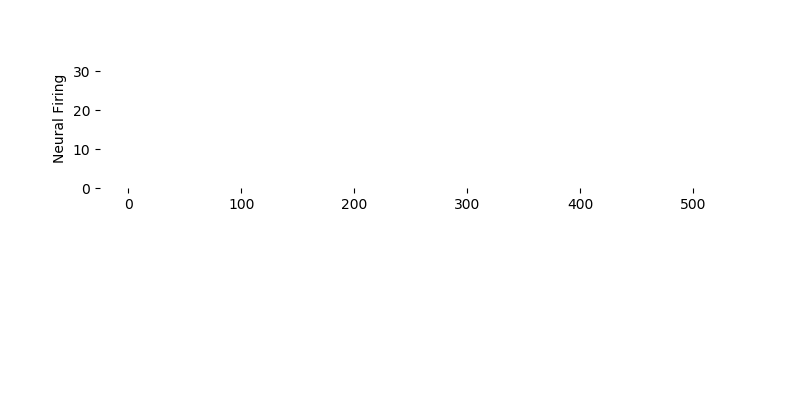

Starting the Main Program
500 6
1000 5
1500 9
2000 7
2500 107
3000 149
3500 141
4000 93
4500 76
5000 44
5500 36
6000 35
6500 16
7000 13
7500 9
8000 11
8500 8
9000 6
9500 8
10000 11
10500 0


ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [10]:
# initialize plot
fig = plt.figure(figsize=(8,4))
# display neural data
ax1 = fig.add_subplot(211)
line1, = ax1.plot(np.arange(neural_index_interval), np.ones(neural_index_interval), 'r-') # Returns a tuple of line objects, thus the comma
plt.ylim((0,np.max(neurosignal)))
plt.ylabel('Neural Firing')
# display command
ax2 = fig.add_subplot(212)
line2, = ax2.plot(np.arange(neural_index_interval), np.ones(neural_index_interval), 'r-') # Returns a tuple of line objects, thus the comma
plt.ylabel('Robot Speed')
plt.ylim((0,300))
plt.show()

have_robot = False
# main loop

# Register the signal handlers
if have_robot:
    signal.signal(signal.SIGTERM, service_shutdown)
    signal.signal(signal.SIGINT, service_shutdown)

print('Starting the Main Program')

# Start the job threads
# Keep the main thread running, otherwise signals are ignored.
running = True
loop_counter = 0
curr_neural_index = 0
while running is True:
    # PAUSE LOOP
    time.sleep(LOOP_TIME)
    loop_counter += 1
    
#    print(cmd_directions)
    #print(running)

    # USER KEYBOARD INPUT
    # command=raw_input("::>")
    
    # NEURAL DATA PROCESSING ----
    
    ## inside loop
    curr_brain_signal = neurosignal[curr_neural_index:curr_neural_index+neural_index_interval]
    movement = signal_movement(curr_brain_signal,speed_rate,neural_index_interval)
    curr_neural_index = curr_neural_index + neural_index_interval

    
    CMD_direction = 'forward'
    CMD_speed = movement
    # ---------------------------
    
    print(curr_neural_index, movement)
    
    # VISUALIZATION
    line1.set_ydata(curr_brain_signal)
    line2.set_ydata(movement)
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    # COMMUNICATION TO ROBOT
    if have_robot:
        try:
            activethread.shutdown_flag.set()
            activethread.join()
        except:
            print("No running threads")

        # Terminate thread if exit command is received, or reached loop number
        if command == 'exit' or loop_counter> NUM_LOOPS:
            # Terminate the running threads.
            # Set the shutdown flag on each thread to trigger a clean shutdown of each thread.
            activethread.shutdown_flag.set()
            # Wait for the threads to close...
            activethread.join()
            running=False
        else:
            # send command
            activethread=RobotCommands(CMD_direction, CMD_speed)
            activethread.start() 
        

print('Exiting main program')

#close serial port
sp.close()
isClosed = sp.is_open
while isClosed == True:
    sp.close
    isClosed = sp.is_open